# Fine-tuning a custom dataset for image captioning

Example follows https://huggingface.co/docs/transformers/main/tasks/image_captioning and https://github.com/NielsRogge/Transformers-Tutorials/blob/master/GIT/Fine_tune_GIT_on_an_image_captioning_dataset.ipynb

Leukemia data from https://www.kaggle.com/datasets/mehradaria/leukemia

## Leukemia Dataset

Will be pulling a few examples from each of the four represented classes: bening, early, pre, and pro. Just for the sake of this notebook each representative of each class will have the same caption (so this is kinda like classification but just making sure it works).

In [1]:
import os
import pandas as pd
from PIL import Image
from datasets import Dataset

directory_1 = './Data/Benign'
directory_2 = './Data/Early'
directory_3 = './Data/Pre'
directory_4 = './Data/Pro'
n_images = 10

def load_images_from_directory(directory):
    images = []
    text_labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') and len(text_labels) < n_images:
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path)
            images.append(image)
            
            if directory == directory_1:
                text_label = "All clear, benign case"
            elif directory == directory_2:
                text_label = "Please take a closer look, early case"
            elif directory == directory_3:
                text_label = "Please take a closer look, pre case"
            elif directory == directory_4:
                text_label = "Please take a closer look, pro case"
            else:
                text_label = "unknown"
            
            text_labels.append(text_label)
    
    return images, text_labels

images_1, text_labels_1 = load_images_from_directory(directory_1)
images_2, text_labels_2 = load_images_from_directory(directory_2)
images_3, text_labels_3 = load_images_from_directory(directory_3)
images_4, text_labels_4 = load_images_from_directory(directory_4)

images = images_1 + images_2 + images_3 + images_4
text_labels = text_labels_1 + text_labels_2 + text_labels_3 + text_labels_4

ds = pd.DataFrame({'image': images, 'text': text_labels})
ds

,image,text
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"All clear, benign case"


In [2]:
from sklearn.model_selection import train_test_split

train_ds, test_ds = train_test_split(ds, test_size=.1)

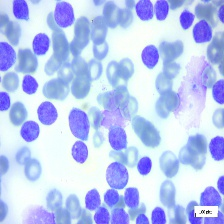

In [3]:
from IPython.display import display

display(train_ds['image'].iloc[0])

## Preprocess Data

Resize/pixel scale the image and tokenize the caption

In [4]:
import torch
from transformers import AutoProcessor
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image

processor = AutoProcessor.from_pretrained("microsoft/git-base")

class CustomDataset(Dataset):
    def __init__(self, dataframe, processor):
        self.dataframe = dataframe
        self.processor = processor
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        text = row['text']
        image = row['image']

        # Preprocess text using the processor
        text_encoding = self.processor(
            text,
            return_tensors="pt",
            padding="max_length",
            max_length=512,
            truncation=True
        )
        
        image = self.transform(image)
        
        return {
            'input_ids': text_encoding['input_ids'].squeeze(),
            'attention_mask': text_encoding['attention_mask'].squeeze(),
            'pixel_values': image.permute(0, 2, 1)
        }

train_dataset = CustomDataset(train_ds, processor)
test_dataset = CustomDataset(test_ds, processor)

2023-09-17 09:55:42.611015: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-17 09:55:42.864179: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 09:55:43.727332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
for k,v in train_dataset[0].items():
  print(k,v.shape)

input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


## PyTorch DataLoader

Allows us to get batches of data from the dataset

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=4)
validation_dataloader = DataLoader(test_dataset, batch_size=4)

In [7]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

input_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
pixel_values torch.Size([4, 3, 224, 224])


In [8]:
processor.decode(batch["input_ids"][0])

'[CLS] please take a closer look, early case [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

## Model

In [9]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

In [10]:
#Dummy pass on our batch to check initial loss
outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss

tensor(12.0344, grad_fn=<NllLossBackward0>)

What does the pre-trained model think of our blood smear images?

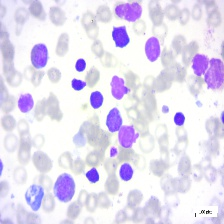

In [11]:
image = Image.open('./Data/Benign/WBC-Benign-087.jpg')
image

In [15]:
device = torch.device("cpu")

inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

purple ink in a white glass


## Training

In [16]:
import torch
from jiwer import wer

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

# Training loop
num_epochs = 20  # Adjust as needed
for epoch in range(num_epochs):
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)
        attention_mask = batch.pop("attention_mask").to(device)

        outputs = model(input_ids=input_ids,
                        pixel_values=pixel_values,
                        attention_mask=attention_mask,
                        labels=input_ids)

        loss = outputs.loss

        #print(f"Epoch {epoch+1}, Batch {idx+1}, Loss: {loss.item()}")

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    # Validation loop
    model.eval()
    total_wer_score = 0.0
    with torch.no_grad():
        for batch in validation_dataloader:
            input_ids = batch.pop("input_ids").to(device)
            pixel_values = batch.pop("pixel_values").to(device)
            attention_mask = batch.pop("attention_mask").to(device)
            labels = input_ids  # Using input_ids as labels

            outputs = model(input_ids=input_ids,
                            pixel_values=pixel_values,
                            attention_mask=attention_mask,
                            labels=labels)

            predicted = outputs.logits.argmax(-1)
            decoded_labels = processor.batch_decode(labels.cpu().numpy(), skip_special_tokens=True)
            decoded_predictions = processor.batch_decode(predicted.cpu().numpy(), skip_special_tokens=True)
            
            wer_score = wer(decoded_labels, decoded_predictions)
            total_wer_score += wer_score

    average_wer_score = total_wer_score / len(validation_dataloader)
    print(f"WER Score after Epoch {epoch+1}: {average_wer_score}")

    model.train()

WER Score after Epoch 1: 51.95454545454545
WER Score after Epoch 2: 128.04545454545453
WER Score after Epoch 3: 66.18181818181819
WER Score after Epoch 4: 36.18181818181818
WER Score after Epoch 5: 36.04545454545455
WER Score after Epoch 6: 0.45454545454545453
WER Score after Epoch 7: 0.4090909090909091
WER Score after Epoch 8: 0.2727272727272727
WER Score after Epoch 9: 0.22727272727272727
WER Score after Epoch 10: 0.2727272727272727
WER Score after Epoch 11: 0.2727272727272727
WER Score after Epoch 12: 0.13636363636363635
WER Score after Epoch 13: 0.13636363636363635
WER Score after Epoch 14: 0.13636363636363635
WER Score after Epoch 15: 0.18181818181818182
WER Score after Epoch 16: 0.18181818181818182
WER Score after Epoch 17: 0.18181818181818182
WER Score after Epoch 18: 0.13636363636363635
WER Score after Epoch 19: 0.13636363636363635
WER Score after Epoch 20: 0.13636363636363635


## Inference

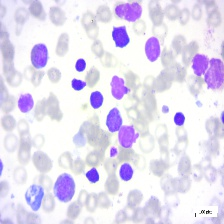

In [17]:
image = Image.open('./Data/Benign/WBC-Benign-087.jpg')
image

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

please take a closer look, pre case


So the model didn't generate the exact correct label but the generated caption follows the general custom caption style that we specified. Should be good to go for easier to tell cases!